In [9]:
import scanpy as sc
import numpy as np
import pandas as pd
import h5py
import scib
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics import adjusted_rand_score

In [10]:
sc.settings.verbosity = 1             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=200, frameon=False, figsize=(3,3), facecolor='white')

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                 9.2.0
asttokens           NA
backcall            0.2.0
cffi                1.15.1
colorama            0.4.6
comm                0.1.3
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.7
decorator           5.1.0
deprecated          1.2.12
executing           1.2.0
google              NA
h5py                3.7.0
igraph              0.10.2
ipykernel           6.23.1
jedi                0.18.2
joblib              1.0.1
kiwisolver          1.3.1
leidenalg           0.9.0
llvmlite            0.39.1
matplotlib          3.4.2
matplotlib_inline   0.1.6
mpl_toolkits        NA
natsort             8.2.0
numba               0.56.3
numpy               1.22.4
packaging           21.3
pandas              1.5.1
parso               0.8.3
patsy               0.5.3
pexpect             4.8.0
pickleshare         0.7.5
pkg_resources       NA
prompt_toolkit      3.0.38
psutil              5.

/home/suyanchi/program/miniconda/envs/dab/lib/python3.9/site-packages/scanpy/_settings.py:447: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)


In [11]:
dataset_name = ["cell_lines", "panc8_rm", "uc3", "crc"]
methods = ['alra', 'dca', 'deepimpute', 'magic', 'saver', 'scimpute', 'scscope', 'scvi']

In [12]:
i=1 # data
j=0 # methods
re = 0.1

In [13]:
# load raw data
adata_raw = sc.read_h5ad('/home/suyanchi/project/dab/data/batch/'+dataset_name[i]+'.h5ad')
adata_raw

AnnData object with n_obs × n_vars = 10865 × 23864
    obs: 'ClusterID', 'ClusterName', 'batch', 'celltype', 'nCount_RNA', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'Selected', 'vst_mean', 'vst_variable', 'vst_variance', 'vst_variance_expected', 'vst_variance_standardized', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'batch_colors', 'celltype_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'pca_cell_embeddings', 'umap_cell_embeddings'
    varm: 'PCs', 'pca_feature_loadings'
    layers: 'norm_data', 'scale_data'
    obsp: 'connectivities', 'distances'

In [14]:
adata_raw.X

<10865x23864 sparse matrix of type '<class 'numpy.float32'>'
	with 41647722 stored elements in Compressed Sparse Row format>

In [15]:
sc.pp.pca(adata_raw)
sc.pp.neighbors(adata_raw)
sc.tl.umap(adata_raw)

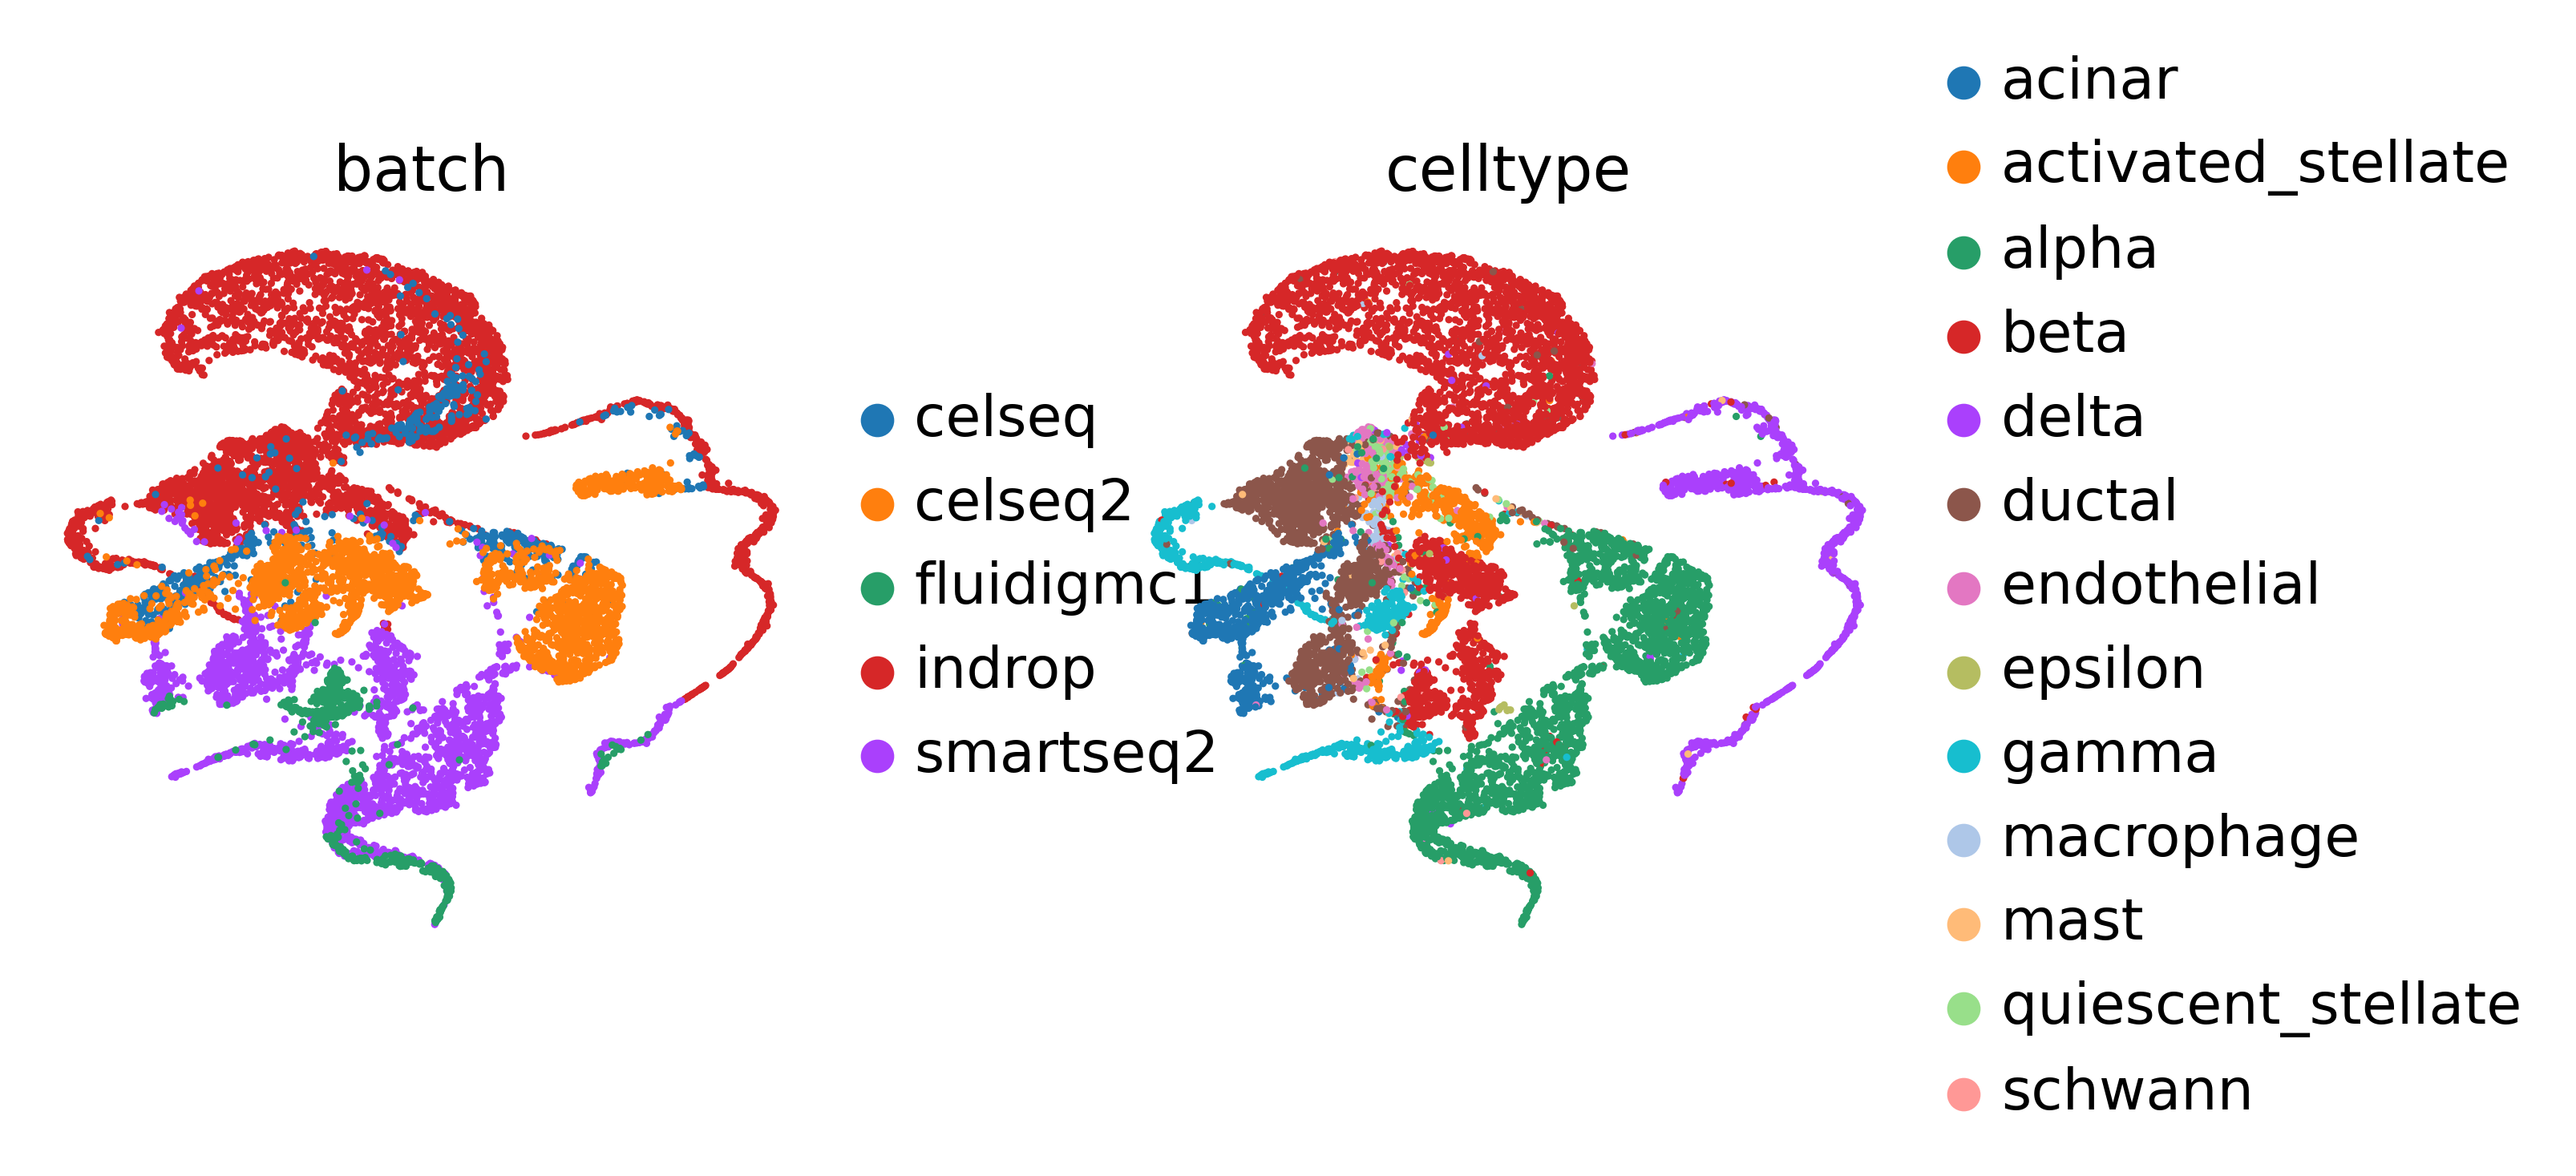

In [17]:
sc.pl.umap(adata_raw, color=['batch', 'celltype'], palette=sc.pl.palettes.vega_20_scanpy)

In [133]:
%%time
sc.external.pp.bbknn(adata_raw, batch_key='batch')

CPU times: user 1.92 s, sys: 1.69 s, total: 3.61 s
Wall time: 2.33 s


In [134]:
sc.tl.umap(adata_raw)

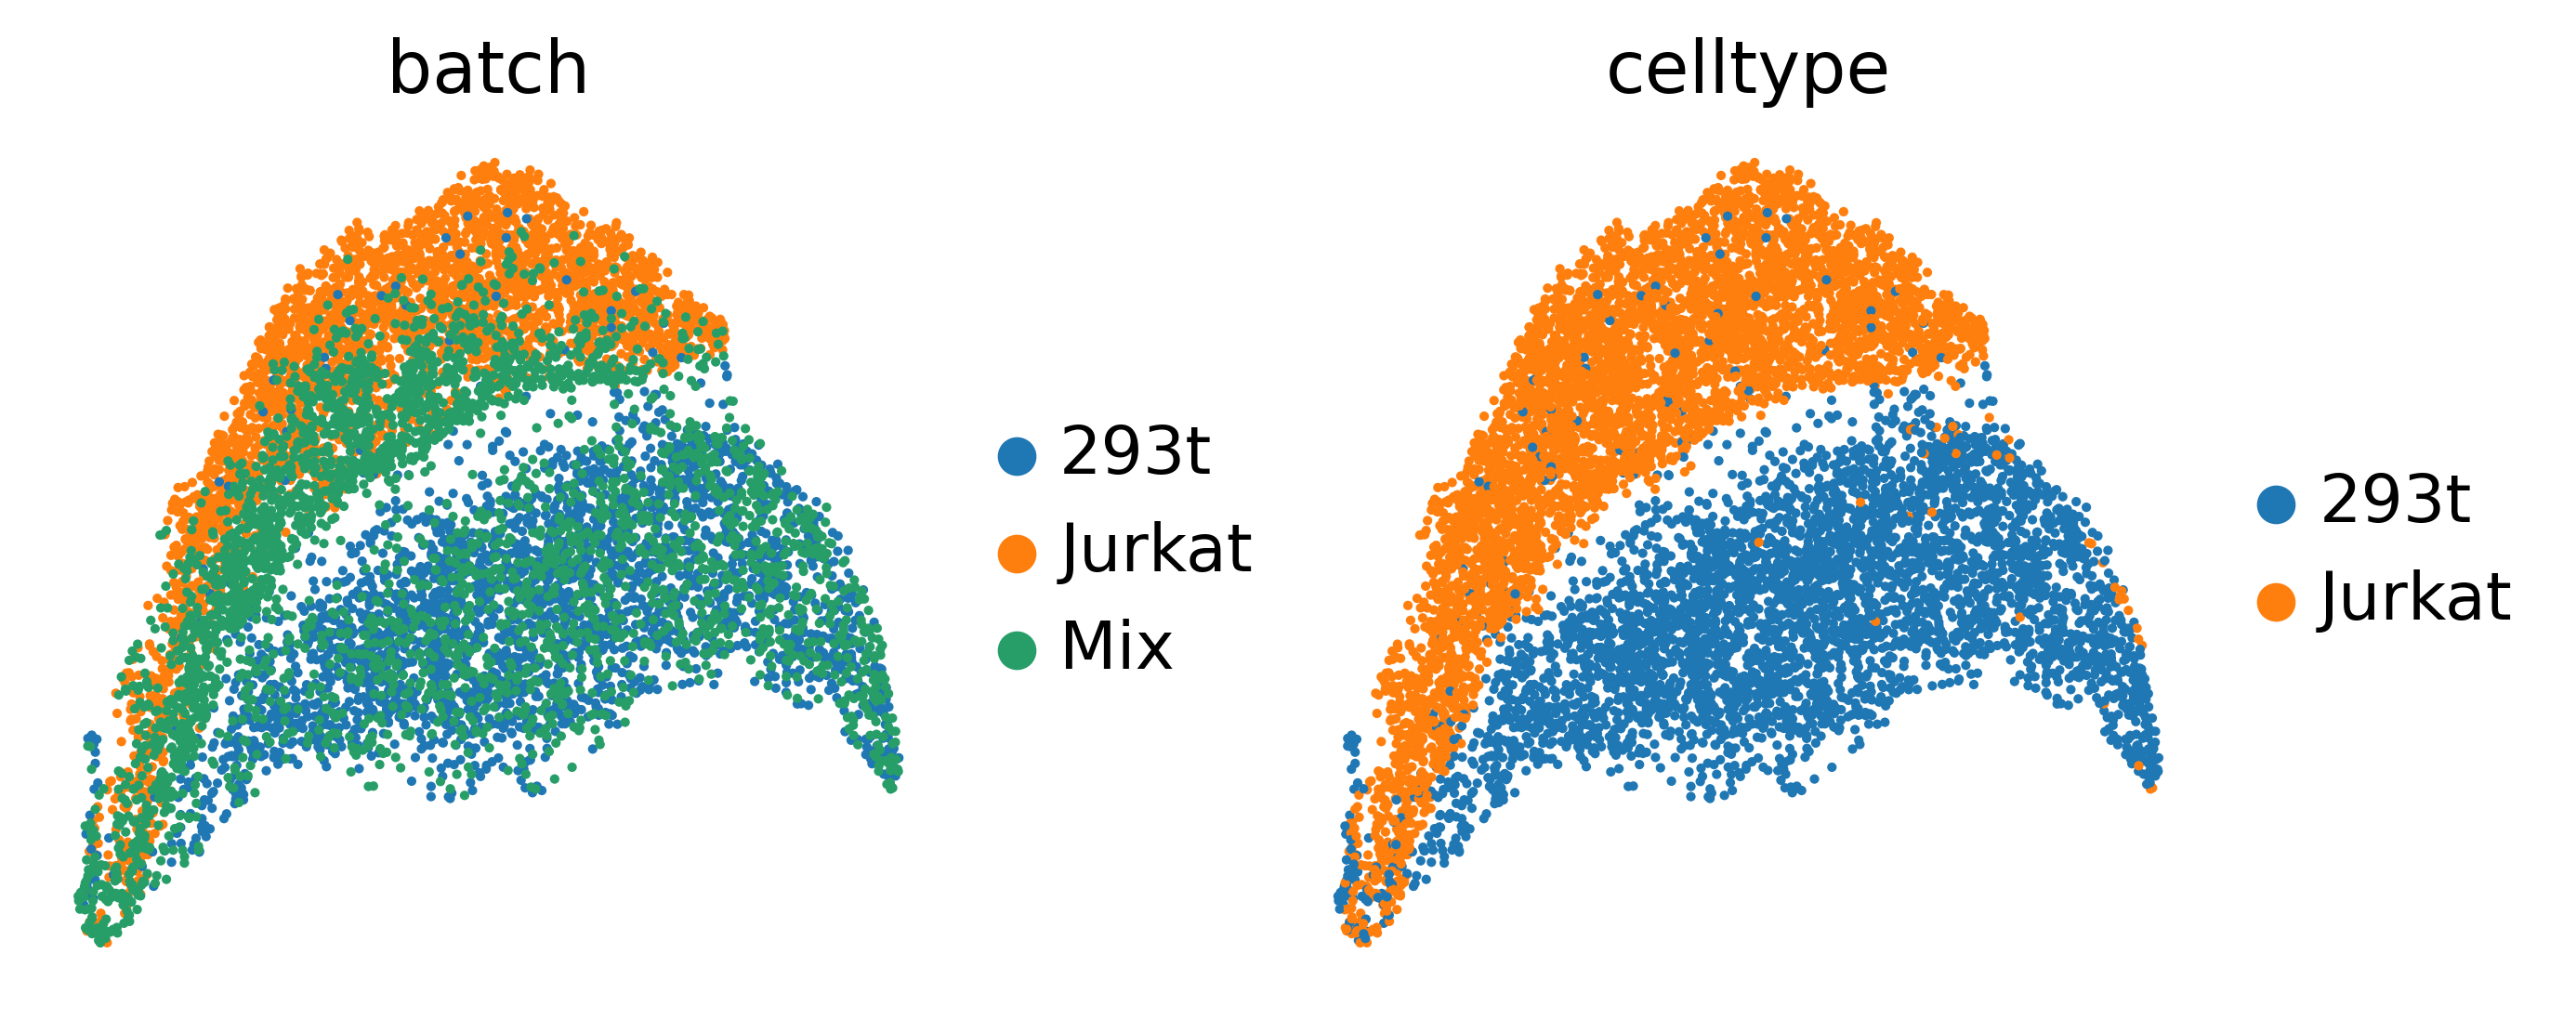

In [135]:
sc.pl.umap(adata_raw, color=['batch', 'celltype'])

In [142]:
sc.tl.leiden(adata_raw, resolution=0.1)

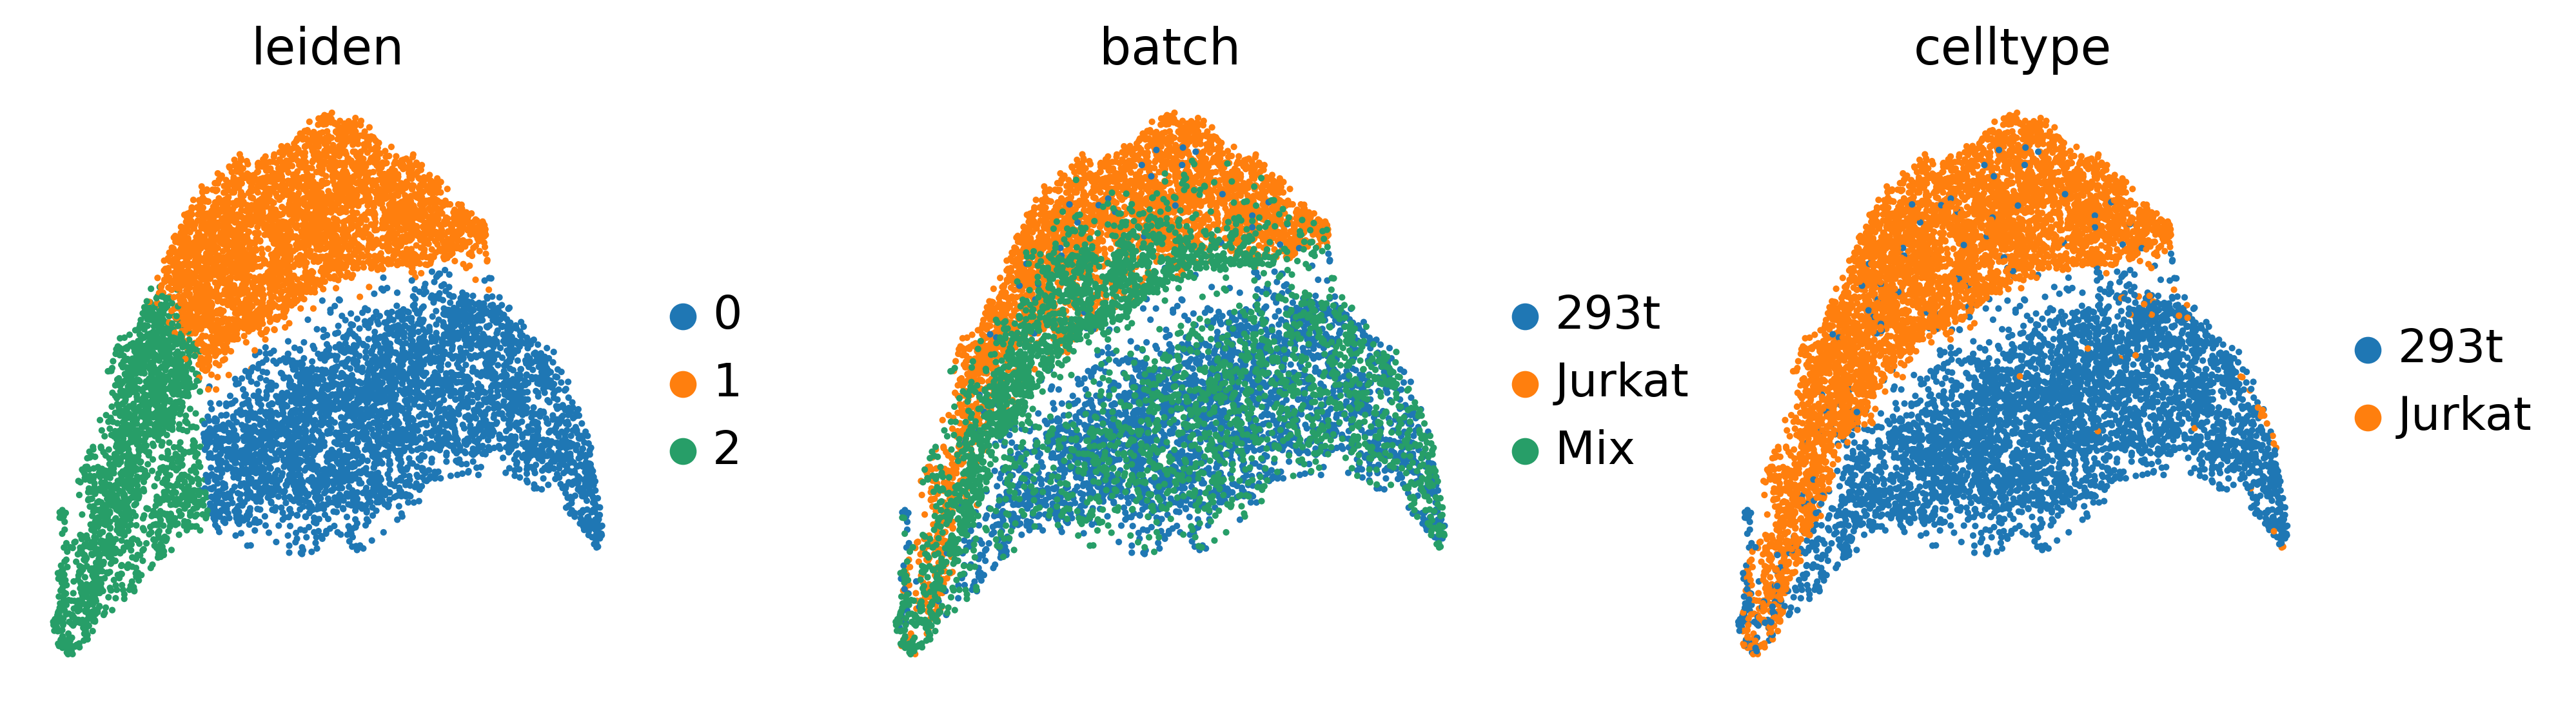

In [143]:
sc.pl.umap(adata_raw, color=['leiden', 'batch', 'celltype'])

In [144]:
nmi = normalized_mutual_info_score(adata_raw.obs['celltype'], adata_raw.obs['leiden'])
ari = adjusted_rand_score(adata_raw.obs['celltype'], adata_raw.obs['leiden'])
print('ARI: {:.4f}, NMI: {:.4f}'.format(ari, nmi))

ARI: 0.6113, NMI: 0.5867


In [145]:
ari = scib.metrics.ari(adata_raw, group1 = 'leiden', group2='celltype')
nmi = scib.metrics.nmi(adata_raw, group1 = 'leiden', group2='celltype')
asw = scib.metrics.silhouette(adata_raw, label_key='celltype', embed='X_pca')
b_asw = scib.metrics.silhouette_batch(adata_raw, batch_key='batch', label_key='celltype', embed='X_pca', verbose=False)
print('ARI: {:.4f}, NMI: {:.4f}, ASW: {:.4f}, batch-ASW: {:.4f}'.format(ari, nmi, asw, b_asw))

/tmp/ipykernel_70074/2637992958.py:1: DeprecationWarning: Keyword argument 'group1' has been deprecated in favour of 'cluster_key'. 'group1' will be removed in a future version.
  ari = scib.metrics.ari(adata_raw, group1 = 'leiden', group2='celltype')
/tmp/ipykernel_70074/2637992958.py:1: DeprecationWarning: Keyword argument 'group2' has been deprecated in favour of 'label_key'. 'group2' will be removed in a future version.
  ari = scib.metrics.ari(adata_raw, group1 = 'leiden', group2='celltype')
/tmp/ipykernel_70074/2637992958.py:2: DeprecationWarning: Keyword argument 'group1' has been deprecated in favour of 'cluster_key'. 'group1' will be removed in a future version.
  nmi = scib.metrics.nmi(adata_raw, group1 = 'leiden', group2='celltype')
/tmp/ipykernel_70074/2637992958.py:2: DeprecationWarning: Keyword argument 'group2' has been deprecated in favour of 'label_key'. 'group2' will be removed in a future version.
  nmi = scib.metrics.nmi(adata_raw, group1 = 'leiden', group2='celltyp

ARI: 0.6113, NMI: 0.5867, ASW: 0.6320, batch-ASW: 0.8600


In [146]:
df = pd.DataFrame(columns=['Methods', 'ARI', 'NMI', 'ASW', 'b_ASW'])

In [147]:
# combineing results 
df1 = pd.DataFrame({'Methods': ['Dropout'],
                   'ARI': [ari],
                   "NMI": [nmi],
                   "ASW": [asw],
                   "b_ASW": [b_asw]})
df = pd.concat([df, df1])
df

,Methods,ARI,NMI,ASW,b_ASW
0,Dropout,0.611329,0.586689,0.632,0.859962


In [125]:
adata_raw.write('/home/suyanchi/project/dab/results/batch/'+dataset_name[i]+'.h5ad')

In [123]:
df.to_csv('/home/suyanchi/project/dab/results/batch/'+dataset_name[i]+'_metric.csv', sep=',')